# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click !here goes the icon of the corresponding button in the gutter! button.
To debug a cell, press Alt+Shift+Enter, or click !here goes the icon of the corresponding button in the gutter! button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/jupyter-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

**Point to note**
- The original dataset has no missing values

The two notes are:
G# (G sharp)
Ab (A flat)

30
Correlation Matrix


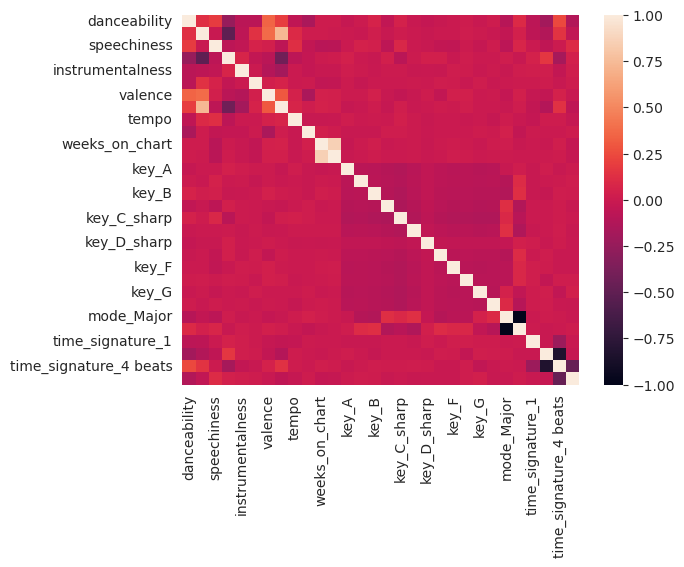

In [157]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import silhouette_score

data = pd.read_csv('data/spotify_top_songs_audio_features.csv')
data.drop(columns=['track_name',"artist_names","id","source"],axis=0,inplace=True)
# sns.barplot(data.groupby(["source","id"]).sum())
# data.isna().sum()
# data.info()
#  !feature encoding

categorical_features = ["key","mode","time_signature"]
encoder = OneHotEncoder(sparse_output=False)
encoded_data = encoder.fit_transform(data[categorical_features])

encoded_feature_names = encoder.get_feature_names_out(categorical_features)
encoded_data_frame = pd.DataFrame(encoded_data, columns=encoded_feature_names)

# combine features back together
cleaned_data = pd.concat([data.drop(columns=categorical_features), encoded_data_frame], axis=1)
for item in cleaned_data.columns:
    if "#" in item:
        cleaned_data.rename(columns={item: item.split("#/")[0] + "_sharp"}, inplace=True)

print(cleaned_data.columns.size)

sns.heatmap(cleaned_data.corr())
print("Correlation Matrix")
# encoded_data_frame = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_features))

# Finding Optimum number of clusters

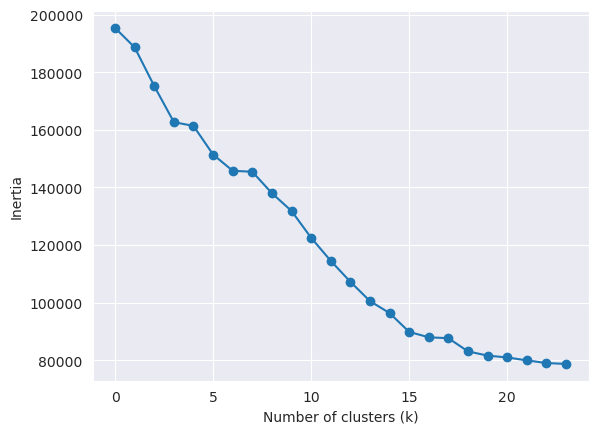

In [158]:

inertia = []
scaler = StandardScaler()
for i in list(range(1,25)):
    pipeline = Pipeline([
        ("scaler",scaler),("kmeans",KMeans(n_clusters=i,random_state=42))
    ])
    pipeline.fit(cleaned_data)
    inertia.append(pipeline.named_steps['kmeans'].inertia_)

plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.plot(inertia, marker='o')
# labels = pipeline.named_steps["kmeans"].labels_

# Evaluate

In [159]:
pipeline = Pipeline([
    ("scaler",scaler),("kmeans",KMeans(n_clusters=15,random_state=42))
])
pipeline.fit(cleaned_data)
inertia.append(pipeline.named_steps['kmeans'].inertia_)